# Plotting

Selection of plotting tool depends on the purpose of the plot. 

This notebook demonstrates interactive and static plotting. 

More on static plotting methods can be found [here](https://github.com/ICWallis/tutorial-publication-ready-figures).

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as py

from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator


## Import data

We will work with the weekly average file made in the last notebook

In [2]:
data = pd.read_csv(r'1-Data-weekly.csv',parse_dates = ['Date'])

In [3]:
data.columns

Index(['Date', 'P-1 TMF T/hr', 'P-2 TMF T/hr', 'P-3 TMF T/hr', 'I-1 TMF T/hr',
       'I-2 TMF T/hr', 'Total_prod_tph', 'Total_inj_tph'],
      dtype='object')

## Interactive plot - interactive data analysis

Writes the data to an html file that can be zoomed

In [4]:
fig = make_subplots(
    rows=1,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.04
    )


fig.append_trace(go.Scatter(
    x = data.Date,
    y = data.Total_prod_tph,
    name = 'Total production',
    ), row=1, col=1)


fig.append_trace(go.Scatter(
    x = data.Date,
    y = data.Total_inj_tph,
    name = 'Total production',
    ), row=1, col=1)

fig.update_layout(
    template='ggplot2',
    title='Mass Ballance',
    width = 1000,
    height = 400,
    showlegend=True
    )

fig.update_yaxes(title_text='TMF', row=2, col=1)

In [5]:
fig = make_subplots(
    rows=1,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.04
    )

fig.append_trace(go.Scatter(
    x = data.Date,
    y = data.Total_prod_tph,
    #mode = 'markers + lines',
    name = 'Total production',
    ), row=1, col=1)


fig.append_trace(go.Scatter(
    x = data.Date,
    y = data.Total_inj_tph,
    #mode = 'markers + lines',
    name = 'Total production',
    ), row=1, col=1)

fig.update_layout(
    template='ggplot2',
    title='Mass Ballance',
    width = 1000,
    height = 400,
    showlegend=True
    )

fig.update_yaxes(title_text='TMF', row=2, col=1)

py.plot(fig, filename= '2-Interactive.html')

'2-Interactive.html'

In [6]:
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.04
    )

fig.append_trace(go.Scatter(
    x = data.Date,
    y = data.Total_prod_tph,
    #mode = 'markers + lines',
    name = 'Total production',
    ), row=1, col=1)


fig.append_trace(go.Scatter(
    x = data.Date,
    y = data.Total_inj_tph,
    #mode = 'markers + lines',
    name = 'Total production',
    ), row=1, col=1)

fig.append_trace(go.Scatter(
    x = data.Date,
    y = data['I-1 TMF T/hr'],
    #mode = 'markers + lines',
    name = 'I1',
    ), row=2, col=1)

fig.append_trace(go.Scatter(
    x = data.Date,
    y = data['I-2 TMF T/hr'],
    #mode = 'markers + lines',
    name = 'I2',
    ), row=2, col=1)

fig.update_layout(
    template='ggplot2',
    title='Mass Ballance',
    width = 1000,
    height = 400,
    showlegend=True
    )

fig.update_yaxes(title_text='TMF', row=2, col=1)

py.plot(fig, filename= '2-Interactive_2.html')

'2-Interactive_2.html'

In [7]:
data.columns

Index(['Date', 'P-1 TMF T/hr', 'P-2 TMF T/hr', 'P-3 TMF T/hr', 'I-1 TMF T/hr',
       'I-2 TMF T/hr', 'Total_prod_tph', 'Total_inj_tph'],
      dtype='object')

## Static plot - advanced formatting for report

### Convert string to date

Use the datetime.strptime method from the datetime package

Python datetime format codes:
- %d	Day of the month as a zero-padded decimal.	01, 02, ..., 31
- %-d	Day of the month as a decimal number.	1, 2, ..., 30
- %b	Abbreviated month name.	Jan, Feb, ..., Dec
- %B	Full month name.	January, February, ...
- %m	Month as a zero-padded decimal number.	01, 02, ..., 12
- %-m	Month as a decimal number.	1, 2, ..., 12
- %y	Year without century as a zero-padded decimal number.	00, 01, ..., 99
- %-y	Year without century as a decimal number.	0, 1, ..., 99
- %Y	Year with century as a decimal number.	2013, 2019 etc.

For more codes https://www.programiz.com/python-programming/datetime/strftime

In [12]:
my_date = datetime.strptime('12-Jan-2020', '%d-%b-%Y') #, '%d/%m/%y

print(my_date)

2020-01-12 00:00:00


In [11]:
my_date_pd = pd.to_datetime('12-Jan-2020')
print(my_date_pd)

2020-01-12 00:00:00


Make plot that highlights periods in the mass ballance with issues

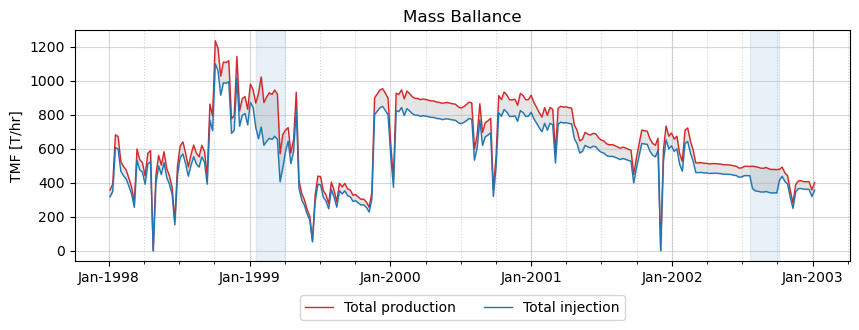

In [10]:


fig, ax = plt.subplots(1,1,figsize=(10,3))

#
# Plot the data
#

ax.plot(
    data.Date.values,
    data.Total_prod_tph.values,
    color = 'tab:red',
    linewidth=1,
    label = 'Total production',
)

ax.plot(
    data.Date.values,
    data.Total_inj_tph.values,
    color = 'tab:blue',
    linewidth=1,
    label = 'Total injection'
)

ax.fill_between(
    data.Date.values, 
    data.Total_prod_tph.values, 
    data.Total_inj_tph.values,
    color = 'k',
    alpha=0.1
    )

#
# Highlight periods where injection wells have metering issues
#

ax.axvspan(
    datetime.strptime('17-Jan-1999', '%d-%b-%Y'), # start of metering issue period
    datetime.strptime('4-Apr-1999', '%d-%b-%Y'), # start of metering issue period
    ymin=0, # bottom of box, proportion from 0-1
    ymax=1,  # top of box, proportion from 0-1
    alpha=0.1,
    color = 'tab:blue',
)

ax.axvspan(
    pd.to_datetime('21-Jul-2002'), # start of metering issue period
    pd.to_datetime('6-Oct-2002'), # start of metering issue period
    ymin=0, # bottom of box, proportion from 0-1
    ymax=1,  # top of box, proportion from 0-1
    alpha=0.1,
    color = 'tab:blue',
)

#
# Format plot
#

plt.title('Mass Ballance')

ax.set_ylabel('TMF [T/hr]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.grid(
    linestyle = '-',
    which='major',
    alpha=0.5,
    )


ax.grid(
    alpha=0.5,
    linestyle = ':',
    which='minor',
    )

ax.legend(
    loc='center', 
    bbox_to_anchor=(0.5, -0.2), # x, y position as proportion
    ncol=2,
)

#
# Export plot
#

plt.savefig(
    '2-Static.png',
    dpi=400,
    bbox_inches='tight',
)

### Figure finishing

- Interoperable with Adobe Illustrator (export to pdf or use live links)
- Deja Vu font pack can be downloaded (e.g., https://www.fontsquirrel.com/fonts/dejavu-sans)